# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Văn Lê Bá Thành
- Student ID: 22127390
- Class: 22CLC08

## Required Libraries

In [56]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Function Definitions

In [57]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path)
    return raw_image

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img.save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def perform_brightness(img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''
    
    # Input brightness
    brightness = input('Enter brightness [-255:255]: ')

    # Perform brightness adjustment
    result = np.uint8(np.clip(img + np.array([brightness], dtype=np.int16), 0, 255))

    # Create result_path for output image
    result_path = img_name + "_brightness" + format

    # Convert np.array to Image object
    img_result = Image.fromarray(result)

    # Show and save image
    show_img(result)
    save_img(img_result, result_path)

def perform_Contrast (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    contrast = input('Enter contrast [-255:255]: ')

    # Check and replace contrast if exceed [-255:255]
    contrast = np.clip(float(contrast), -255, 255)

    # Calculate factor between dark and bright color
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    
    # Perform contrast adjustment
    result = np.uint8(np.clip(factor * (img.astype(float) - 128) + 128, 0, 255))

    # Create result_path for output image
    result_path = result_path + img_name + "_contrast" + format

    # Convert np.array to Image object
    img_result = Image.fromarray(np.uint8(result))

    # Show and save image
    show_img(result)
    save_img(img_result, result_path)

def flip(img, direction):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    direction : str
        Direction for flipping (vertical or horizontal)

    '''

    if direction == 'vertical':
        return np.flipud(img)
    elif direction == 'horizontal':
        return np.fliplr(img)

def perform_flip(img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    for direction in range(1, 3):
        if direction == '1':
            direction = 'vertical'
        elif direction == '2':
            direction = 'horizontal'
        result = flip(img, direction)
        result_path = img_name + "_flip" + "_" + str(direction) + format
        img_result = Image.fromarray(np.uint8(result))
        show_img(result)
        save_img(img_result, result_path)

def perform_grayscale (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    weight = np.array([0.299, 0.587, 0.114])
    result = np.uint8(np.dot(img[..., :3], weight))
    result_path = img_name + "_grayscale" + format
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

def perform_sephia (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    weight = np.array([[0.393, 0.769, 0.189], 
                       [0.349, 0.686, 0.168], 
                       [0.272, 0.534, 0.131]])
    
    print(weight.shape)
    img_float = img.astype(np.float32)
    
    # Apply the sepia filter
    result = np.dot(img_float[..., :3], weight.T)
    result = np.clip(result, 0, 255).astype(np.uint8)
    print(result.shape)

    result_path = img_name + "_sephia" + format
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

def get_kernel (type):
    GAUSSIAN_KERNEL_3X3 = np.array([[1,2,1], [2,4,2], [1,2,1]]).astype(np.float32)/16
    GAUSSIAN_KERNEL_5X5 = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]).astype(np.float32)/256
    SHARPEN_KERNEL = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    if type == "blur3x3":
        return GAUSSIAN_KERNEL_3X3
    elif type == "blur5x5":
        return GAUSSIAN_KERNEL_5X5
    elif type == "sharp":
        return SHARPEN_KERNEL
    
def apply_filter (img, type, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    # get need kernel
    kernel = get_kernel(type)
    # Get image height, width
    image_height, image_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    # Create padding
    padding = kernel_height // 2
    # Create a result matrix
    result = np.zeros((image_height, image_width, 3))
    # Create a temporary matrix that can contain padding and original image 
    b = np.zeros((image_height+2*padding, image_width+2*padding, 3))
    # Sao chép ảnh vào vị trí trung tâm của ma trận b
    b[padding:padding+image_height, padding:padding+image_width,:] = img
    # 
    for i in range(image_height) :
        for j in range(image_width):
            if type == "blur":
                result[i,j,:] = np.sum(b[i:i+kernel_height, j:j+kernel_width, :] * kernel[:,:,np.newaxis], axis=(0,1))
            else:
                result[i,j,:] = np.clip(np.sum(b[i:i+kernel_height, j:j+kernel_width, :] * kernel[:,:,np.newaxis], axis=(0,1)), a_min=0, a_max=255)
    blurred_img = Image.fromarray(np.uint8(result))   
    result_path = img_name + "_" + str(type) + format
    show_img(blurred_img)
    save_img(blurred_img, result_path)     

def crop_img(img, img_name, format):
    size = img.shape[0]
    startPoint = size//4 - 1
    result = img[startPoint: 3*size//4 - 1, startPoint: 3*size//4 - 1]
    cropped_img = Image.fromarray(np.uint8(result))   
    result_path = img_name + "_crop" + format
    print(result.shape[0])
    show_img(cropped_img)
    save_img(cropped_img, result_path)

def apply_circle(img, img_name, format):
    size = img.shape[0]
    center_index = radius = size//2
    matrix_index_j = np.tile(np.arange(size), reps=(size, 1))
    matrix_index_i = matrix_index_j.copy().T
    # Tạo mảng Mask (boolean) để đánh dấu các điểm ảnh nằm bên ngoài đường tròn
    masks = ((matrix_index_i-center_index)**2 +
             (matrix_index_j-center_index)**2) > (radius**2)
    # Gán màu các điểm ảnh nằm bên ngoài đường tròn bằng màu đen
    img[masks] = [0, 0, 0]
    circle_img = Image.fromarray(np.uint8(img))
    result_path = img_name + "_circle" + format
    show_img(circle_img)
    save_img(circle_img, result_path)


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [58]:
# YOUR CODE HERE
from time import time
import os

def test ():
    print("Enter image path: ")
    img_path = input()

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img).astype(np.float32)
    # Show original Image
    show_img(raw_img)
    t0 = time()
    # Perform brightness adjustment
    #perform_brightness(pic, img_name, format)

    # Perform sephia adjustment
    #perform_sephia(raw_img, img_name, format)    
    #perform_flip(pic, result_path, img_name, format)
    #perform_grayscale(pic, result_path, img_name, format)
    #perform_blend(pic, result_path, img_name, format)
    #apply_filter(pic, 'sharp', img_name, format)
    #crop_img(pic, img_name, format)
    apply_circle(pic, img_name, format)
    print(f'{time() - t0:0.3f} seconds')


## Main FUNCTION

In [59]:
def main():
    print("Enter image path: ")
    img_path = input()

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img).astype(np.float32)
    # Show original Image
    show_img(raw_img)

    # Perform brightness adjustment
    #perform_brightness(pic, img_name, format)

    # Perform sephia adjustment
    #perform_sephia(raw_img, img_name, format)    
    #perform_flip(pic, result_path, img_name, format)
    #perform_grayscale(pic, result_path, img_name, format)
    #perform_blend(pic, result_path, img_name, format)
    apply_filter(pic, 'blur5x5', img_name, format)

Enter image path: 
256
0.011 seconds


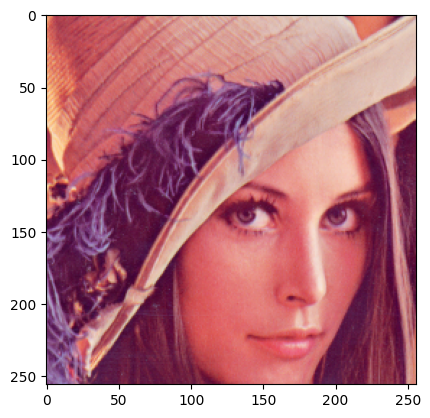

In [60]:
# Call main function
test()